# Predicting which customers are likely to leave a bank using Artificial Neural Networks

__IMPORTING THE LIBRARIES__

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

__IMPORTING THE DATASET__

In [156]:
# Importing the dataset
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

**VISUALIZATIONS**

**Plotting age - the mean is around the 40 mark **

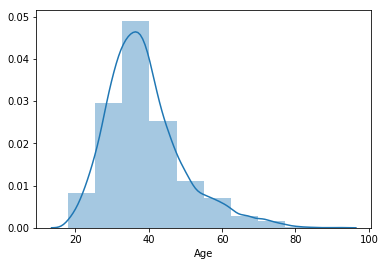

In [157]:
# Seeing the distribution of age of people who have an account in the bank
sns.distplot(dataset.Age, bins = 10)
plt.show()

** Plotting Balance**

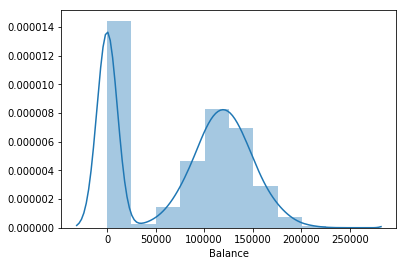

In [158]:
sns.distplot(dataset.Balance, bins = 10)
plt.show()

** This boxlplot shows that the average age of males and females is almost equal in France whereas average age of males is little lower in SPain and Germany**

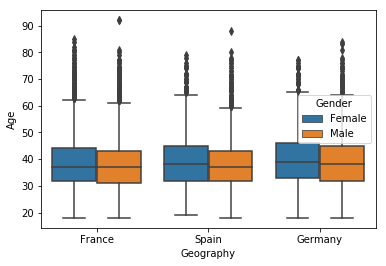

In [160]:
sns.boxplot(data = dataset, x= 'Geography', y = 'Age')
plt.show()

In [167]:
dataset.groupby("Gender")['Gender'].count()

Gender
Female    4543
Male      5457
Name: Gender, dtype: int64

***

__Females are more likely to leave the bank from all the mentioned states__

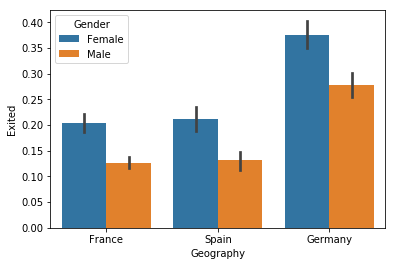

In [169]:
sns.barplot(x="Geography", y="Exited", hue = 'Gender', data=dataset)
plt.show()

__ Removing columns like customer id, name which do not play any role in deciding whether the customer would leave or not__

In [123]:
# Removing unnecessary columns
dataset = dataset.iloc[:,3:]

In [125]:
dataset.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


__ Using getdummies function of pandas to create dummy variables for Geography and Gender__

In [126]:
n = dataset['Exited']
dataset.drop('Exited', axis = 1, inplace = True)
dataset = pd.get_dummies(dataset, drop_first = True)
dataset['Exited'] = n
dataset.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,619,42,2,0.00,1,1,1,101348.88,0,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0


__Creating X and y numpy arrays where X is independent variables and y is dependent variable__

In [127]:
# Creating X and Y
X = dataset.iloc[:,:11].values
y = dataset.iloc[:,-1].values

__Splitting dataset into test and train__

In [128]:
# Splitting into test and train
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

__Scaling features is important to run an artificial neural network __

In [129]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

__Importing keras library - Keras uses tensorflow backend__

In [130]:
# importing libraries for ANN
import keras

__Initializing sequential to initialize the NN and Dense that helps in adding more layers to the NN__

In [131]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# initializing the ANN
ann = Sequential()

__Adding the input layer__

input_dim = 6    - It is decided by trial and test but a good jump off point is average of input dimensions and final class

init = 'uniform' - Intial weights would be decided uniformly  

activation function = rectifier activation function (RELU) - We have many options like tanh, sigmoid etc but relu is the most popular for the hidden layers

imput dim = No. of features that come in as an input to the first layer - we have 11 features__

In [133]:
# Adding the input layer
ann.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))

C:\Users\Prateikm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`
  


__Adding a hidden layer - This layer would not have input dimensions and the input is coming from the previous layer, the ouput dimension and weights remain same as the previous layer__

In [134]:
# Adding the hidden layer
ann.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

C:\Users\Prateikm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  


__Final layer - Activation function is sigmoid as the output of final layer has to give probabilities__ 

In [135]:
# Adding the output layer - use 'softmax' if there are more than 1 categories
ann.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

C:\Users\Prateikm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


__Compiling all the layers together__

In [136]:
# Compiling the Artificial neural network - loss function = 'binary_crossentropy' for binary and 'categorical_crossentropy'
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

__ Fitting the neural network__

__Batch_size: The number of rows that are entered through the neural network to calculate the cose function (Forward Propagation)__

__Epochs: The number of times all the datapoints are passed through the neural network__ 

In [137]:
# Fitting the ann to the training set
ann.fit(X_train, y_train, batch_size= 10, nb_epoch = 100)

C:\Users\Prateikm\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
8000/8000 [==============================] - 3s 316us/step - loss: 0.4820 - acc: 0.7967
Epoch 2/100
8000/8000 [==============================] - 2s 260us/step - loss: 0.4310 - acc: 0.7972
Epoch 3/100
8000/8000 [==============================] - 2s 266us/step - loss: 0.4282 - acc: 0.7972
Epoch 4/100
8000/8000 [==============================] - 2s 264us/step - loss: 0.4244 - acc: 0.7985
Epoch 5/100
8000/8000 [==============================] - 2s 305us/step - loss: 0.4201 - acc: 0.8196
Epoch 6/100
8000/8000 [==============================] - 2s 280us/step - loss: 0.4170 - acc: 0.8266
Epoch 7/100
8000/8000 [==============================] - 2s 267us/step - loss: 0.4152 - acc: 0.8297
Epoch 8/100
8000/8000 [==============================] - 2s 207us/step - loss: 0.4134 - acc: 0.8314
Epoch 9/100
8000/8000 [==============================] - 2s 249us/step - loss: 0.4117 - acc: 0.8320
Epoch 10/100
8000/8000 [==============================] - 2s 254us/step - loss: 0.4109 - acc: 0.8330

8000/8000 [==============================] - 2s 240us/step - loss: 0.3439 - acc: 0.8532
Epoch 82/100
8000/8000 [==============================] - 2s 195us/step - loss: 0.3432 - acc: 0.8560
Epoch 83/100
8000/8000 [==============================] - 1s 157us/step - loss: 0.3437 - acc: 0.8549
Epoch 84/100
8000/8000 [==============================] - 1s 157us/step - loss: 0.3429 - acc: 0.8551
Epoch 85/100
8000/8000 [==============================] - 2s 212us/step - loss: 0.3433 - acc: 0.8555
Epoch 86/100
8000/8000 [==============================] - 1s 182us/step - loss: 0.3418 - acc: 0.8577
Epoch 87/100
8000/8000 [==============================] - 2s 190us/step - loss: 0.3421 - acc: 0.8550
Epoch 88/100
8000/8000 [==============================] - 1s 163us/step - loss: 0.3421 - acc: 0.8566
Epoch 89/100
8000/8000 [==============================] - 1s 170us/step - loss: 0.3415 - acc: 0.8576
Epoch 90/100
8000/8000 [==============================] - 2s 225us/step - loss: 0.3413 - acc: 0.8567
Epo

__ Predictin got the test set - we get probabilities which can be used to rank customers on basis of their chances of leaving__

In [138]:
# Making prediction
y_pred = ann.predict(X_test)
y_pred

array([[ 0.05655296],
       [ 0.06380876],
       [ 0.08958009],
       ..., 
       [ 0.00723501],
       [ 0.06090479],
       [ 0.34477067]], dtype=float32)

__ Convert probabilities into 1 if greater than 0.5 and 0 if not__

In [139]:
# Convert probabilities into true or false - threshold = 0.5
y_pred = (y_pred > 0.5)

In [140]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

__Confusion Matrix__

In [141]:
cm

array([[1559,   26],
       [ 266,  149]], dtype=int64)

# Area under the curve is 67% and below is plotted AUC

In [142]:
# roc auc score - sensitivity vs specificity plot
# Area under curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.67131617954467704

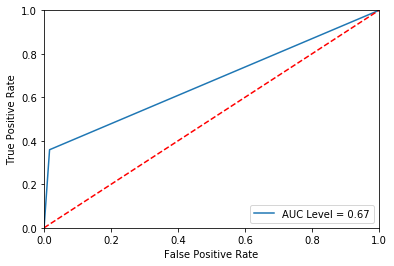

In [143]:
# Plotting roc curve

from sklearn import metrics

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate,label='AUC Level = %0.2f' % (roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()